In [1]:
import AgarwalDudikWu as ADW

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import softmax
import collections
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
import xgboost as xgb

from FairReg import FairReg
from evaluation import get_stats, get_risk_unf_wrt_eps, get_stats_ADW
from evaluation_measures import DP_unfairness, prob_unfairness, prob_unfairness_summary, DP_unfairness_summary
from plots import plot_distributions_compare, plot_predictions_compare, plot_distributions, plot_predictions, plot_risk_history,plot_unfairness_history,plot_unfairness_vs_risk, plot_risk_unf_compare, plot_time_compare
from data_prep import get_lawschool_data, get_communities_data, get_frequencies

import time

# Communities and Crime

In [5]:
num=10
T=15000

eps_list = []
i_list  = [1, 2, 4, 5, 6, 8, 16, 32, 128, 512]
for i in i_list:
    eps_list+=[[2**(-i), 2**(-i)]]

#### SDG

In [10]:
results_crime_sdg = get_risk_unf_wrt_eps(dataset='communities', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     alg={'base':'SGD'},
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 10  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 10  : collecting statistics for eps=[0.25, 0.25]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 

In [11]:
results_crime_sdg

{'risk': {'mean': [0.021163954966590282,
   0.021164406414516078,
   0.02167474713849054,
   0.02462839574822239,
   0.029745185261752495,
   0.037392816278103154,
   0.0400609280201615,
   0.04038341655869153,
   0.041063968628052436,
   0.04022066860980007],
  'std': [0.0016447062018657072,
   0.0016445981723588283,
   0.0017416064159034897,
   0.002306479139814187,
   0.004219188188200506,
   0.004976589299334756,
   0.004499118432136821,
   0.0050982196229748195,
   0.00493062379487869,
   0.005273541269856084]},
 'unf': {0: {'mean': [0.4854126690453587,
    0.48533838711814853,
    0.4749941846745661,
    0.34802494500090864,
    0.22003635592808876,
    0.11073528591515558,
    0.08768863313039107,
    0.09634365499639608,
    0.10443527340122163,
    0.09956715203671077],
   'std': [0.03543420266897721,
    0.03535538233611305,
    0.0425478618085346,
    0.0673469721366309,
    0.0433810061503403,
    0.04383672421057169,
    0.031357479625689785,
    0.03860174836098861,
    0

#### AC-SA

In [14]:
results_crime_acsa = get_risk_unf_wrt_eps(dataset='communities', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     alg={'base':'ACSA'},
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 10  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 10  : collecting statistics for eps=[0.25, 0.25]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 

In [15]:
results_crime_acsa

{'risk': {'mean': [0.021163126714662778,
   0.021160827911404965,
   0.02157391688941621,
   0.02476110798630679,
   0.030007536942511015,
   0.04000560214794288,
   0.04159173975494468,
   0.04188134420936011,
   0.0416773565421047,
   0.040824966300515145],
  'std': [0.0016448485783314164,
   0.0016455751452617011,
   0.0017206346643935206,
   0.0020595166406841875,
   0.004059424619549529,
   0.005196822406182924,
   0.005040494452889679,
   0.004733629342109412,
   0.00534505157723355,
   0.004287693016063038]},
 'unf': {0: {'mean': [0.48527474252563374,
    0.48491285168223175,
    0.4671605451574356,
    0.33516677510023696,
    0.2208591897366808,
    0.08523194435544953,
    0.09695992010445938,
    0.10057160254365141,
    0.09117082204812024,
    0.08912673399584639],
   'std': [0.03545232696094552,
    0.035474697356111126,
    0.04299365459520498,
    0.04869934364112962,
    0.040381395253818425,
    0.04179902517233961,
    0.025120954130148032,
    0.02444946618611665,
 

#### AC-SA-2

In [6]:
results_crime_acsa2 = get_risk_unf_wrt_eps(dataset='communities', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     alg={'base':'ACSA2'},
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 10  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 10  : collecting statistics for eps=[0.25, 0.25]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 

In [7]:
results_crime_acsa2

{'risk': {'mean': [0.02116328103135696,
   0.021161331749244904,
   0.02160138043742124,
   0.024791481344634374,
   0.029862035742179764,
   0.039551731129404966,
   0.04247611438942579,
   0.04269901256458442,
   0.04253491263115417,
   0.042183687478907335],
  'std': [0.0016449190927658784,
   0.0016454582911388383,
   0.0017297968553038794,
   0.00227172902413911,
   0.004068393342706504,
   0.005380563985099549,
   0.00610972203974774,
   0.004653820321894354,
   0.005730998295608216,
   0.005424981085350439]},
 'unf': {0: {'mean': [0.4852843172654772,
    0.48490860497933125,
    0.466065778861946,
    0.3349111528701785,
    0.21775180577236547,
    0.08586393418641146,
    0.11039844117601376,
    0.09235549874907353,
    0.08773953194986614,
    0.1009641330703173],
   'std': [0.03545160198195199,
    0.03551456917658483,
    0.04523522373491154,
    0.0578459967732514,
    0.04127996650051865,
    0.041120354899957814,
    0.04526862072945973,
    0.040820552515353964,
    0.

#### SGD3 with AC-SA

In [8]:
results_crime_sgd3_acsa = get_risk_unf_wrt_eps(dataset='communities', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     alg={'base':'SGD3', 'method':'ACSA'},
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 10  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 10  : collecting statistics for eps=[0.25, 0.25]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 

In [9]:
results_crime_sgd3_acsa

{'risk': {'mean': [0.02116395134245695,
   0.021163941810223304,
   0.021773480665804357,
   0.02556584064872223,
   0.03279188248942007,
   0.04046428218888094,
   0.0411592419398696,
   0.0415248779964789,
   0.041885686881252764,
   0.04137357816198236],
  'std': [0.0016447070157420147,
   0.0016447111084886082,
   0.0017041261104097343,
   0.0026259061814621434,
   0.0045490852089858265,
   0.005535645900883739,
   0.00507066183648381,
   0.004779520660285787,
   0.00553465673953018,
   0.005030735953096185]},
 'unf': {0: {'mean': [0.48541223338703327,
    0.48541053403916534,
    0.471421992404401,
    0.32121091924724354,
    0.16033899211323355,
    0.08355349273510557,
    0.08199496888624677,
    0.07446766919619315,
    0.08206951817744516,
    0.08561587731006685],
   'std': [0.035434265787089705,
    0.0354347257152903,
    0.043976782951809776,
    0.054711710595390296,
    0.0383288027271484,
    0.04296703648390116,
    0.03614908499286324,
    0.029763605427892123,
    

#### SGD3 with AS-SA-2

In [11]:
results_crime = get_risk_unf_wrt_eps(dataset='communities', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 10  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 10  : collecting statistics for eps=[0.25, 0.25]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 

In [12]:
results_crime

{'risk': {'mean': [0.021163951958749427,
   0.021163939793051582,
   0.02179000217159035,
   0.02667132910764882,
   0.03392803115562077,
   0.04033561802828968,
   0.04206774784077896,
   0.04285152936802482,
   0.04174730158982162,
   0.0423747743145569],
  'std': [0.0016447045124564693,
   0.0016447207278106198,
   0.0017277301668993297,
   0.0033003963095914897,
   0.004676850149713499,
   0.0044771050813880685,
   0.004558973449586012,
   0.004887532152352839,
   0.005285327020235393,
   0.00519919826171498]},
 'unf': {0: {'mean': [0.4854119450858052,
    0.48540916221240493,
    0.46928985658213024,
    0.30119808451017904,
    0.14561631291423635,
    0.092628804544597,
    0.08308959396005489,
    0.07352522900606029,
    0.08322818123043567,
    0.07542132900757778],
   'std': [0.03543435835441316,
    0.03543440594851057,
    0.04430673512460514,
    0.05391274629695877,
    0.044825267347050675,
    0.033676762535894605,
    0.03232668451792759,
    0.028002956080500064,
   

In [10]:
results_crime_sgd3_acsa2 = {'risk': {'mean': [0.021163951958749427,
   0.021163939793051582,
   0.02179000217159035,
   0.02667132910764882,
   0.03392803115562077,
   0.04033561802828968,
   0.04206774784077896,
   0.04285152936802482,
   0.04174730158982162,
   0.0423747743145569],
  'std': [0.0016447045124564693,
   0.0016447207278106198,
   0.0017277301668993297,
   0.0033003963095914897,
   0.004676850149713499,
   0.0044771050813880685,
   0.004558973449586012,
   0.004887532152352839,
   0.005285327020235393,
   0.00519919826171498]},
 'unf': {0: {'mean': [0.4854119450858052,
    0.48540916221240493,
    0.46928985658213024,
    0.30119808451017904,
    0.14561631291423635,
    0.092628804544597,
    0.08308959396005489,
    0.07352522900606029,
    0.08322818123043567,
    0.07542132900757778],
   'std': [0.03543435835441316,
    0.03543440594851057,
    0.04430673512460514,
    0.05391274629695877,
    0.044825267347050675,
    0.033676762535894605,
    0.03232668451792759,
    0.028002956080500064,
    0.037764023229871095,
    0.026721775371483646]},
  1: {'mean': [0.12985542480002432,
    0.12985468033707653,
    0.12554250940413675,
    0.08057528375431541,
    0.03895468243565555,
    0.024779680196643825,
    0.02222778946702106,
    0.01966916954302247,
    0.02226486376865161,
    0.020176406486103582],
   'std': [0.009479255101180662,
    0.009479267833359561,
    0.011852757167091813,
    0.014422518117657643,
    0.011991472793478584,
    0.00900907023253235,
    0.008647902864668496,
    0.007491236658477766,
    0.010102477551940102,
    0.007148500417849152]}},
 'avg_prob_unf': {0: {'mean': [0.033476685867986564,
    0.0334764939456831,
    0.032364817695319334,
    0.021491182543526176,
    0.013085854837259159,
    0.009939331627789805,
    0.008786926931044797,
    0.008525611070701617,
    0.009055390062887947,
    0.00861567439837849],
   'std': [0.0024437488520284954,
    0.0024437521343800435,
    0.0030556369051451832,
    0.0030890088037195543,
    0.0020823722201592622,
    0.00298370986050516,
    0.00241535672149943,
    0.002230390399522582,
    0.003296575857259685,
    0.001842859110701239]},
  1: {'mean': [0.00895554653793271,
    0.008955495195660449,
    0.008658104096837017,
    0.005749233546675789,
    0.0035006745424514944,
    0.002658929480045682,
    0.002350642873273133,
    0.0022807367195507517,
    0.002422461035931808,
    0.0023048300938337376],
   'std': [0.0006537417311159049,
    0.000653742609197208,
    0.0008174315287649526,
    0.0008263590430332555,
    0.0005570677276859178,
    0.0007981898989886422,
    0.0006461463840953884,
    0.0005966649476429828,
    0.0008818865350631004,
    0.0004929941570028775]}},
 'base_risk': {'mean': 0.019590345903555507, 'std': 0.0016851448093341702},
 'base_DP': {0: {'mean': 0.4636782635593766, 'std': 0.04224813162155483},
  1: {'mean': 0.17614306453389134, 'std': 0.016081084656554896}},
 'training_time_hist': [7.2261059284210205,
  6.186522960662842,
  5.436861038208008,
  5.737361192703247,
  5.469204664230347,
  5.68970799446106,
  5.359716415405273,
  5.501314163208008,
  5.7161877155303955,
  5.29292368888855,
  5.692374229431152,
  7.316725254058838,
  5.551362752914429,
  5.906297445297241,
  5.37405800819397,
  6.000127792358398,
  6.909805536270142,
  5.698027849197388,
  5.806108713150024,
  5.369399785995483,
  5.600597620010376,
  5.855836629867554,
  5.663818120956421,
  6.0393595695495605,
  5.598508596420288,
  6.283472299575806,
  5.901461362838745,
  5.060946464538574,
  6.236661434173584,
  5.83608078956604,
  5.758948087692261,
  5.4964306354522705,
  5.752009153366089,
  6.119214296340942,
  6.365845680236816,
  5.522581577301025,
  5.531606912612915,
  6.408869504928589,
  5.983618974685669,
  6.7092390060424805,
  5.853444814682007,
  5.75505805015564,
  5.520399332046509,
  5.489722728729248,
  5.736712217330933,
  7.372284650802612,
  6.6899659633636475,
  5.835648059844971,
  6.587613821029663,
  6.135094881057739,
  6.42046332359314,
  6.149096965789795,
  5.917806625366211,
  6.826240539550781,
  5.598019123077393,
  6.920708179473877,
  5.954238414764404,
  6.159639120101929,
  5.918651819229126,
  5.722467422485352,
  5.341642141342163,
  5.813119173049927,
  5.628753900527954,
  6.230227947235107,
  5.682090759277344,
  5.839046001434326,
  6.007182836532593,
  6.061088800430298,
  6.1314427852630615,
  5.759458303451538,
  5.741051435470581,
  5.708657741546631,
  5.33364725112915,
  6.107558488845825,
  5.364081144332886,
  5.419801950454712,
  5.672457933425903,
  5.548645973205566,
  5.5807883739471436,
  6.314921617507935,
  6.11221170425415,
  5.705108642578125,
  6.128926515579224,
  5.359342336654663,
  6.075453042984009,
  6.111116409301758,
  5.340378761291504,
  5.610466003417969,
  5.299557209014893,
  6.881508111953735,
  5.580966234207153,
  6.402169466018677,
  5.4710752964019775,
  5.485875844955444,
  6.884177923202515,
  5.354170560836792,
  5.918684005737305,
  5.450403928756714,
  5.649172782897949,
  5.80712890625],
 'clf_score': 0.9311557788944724}

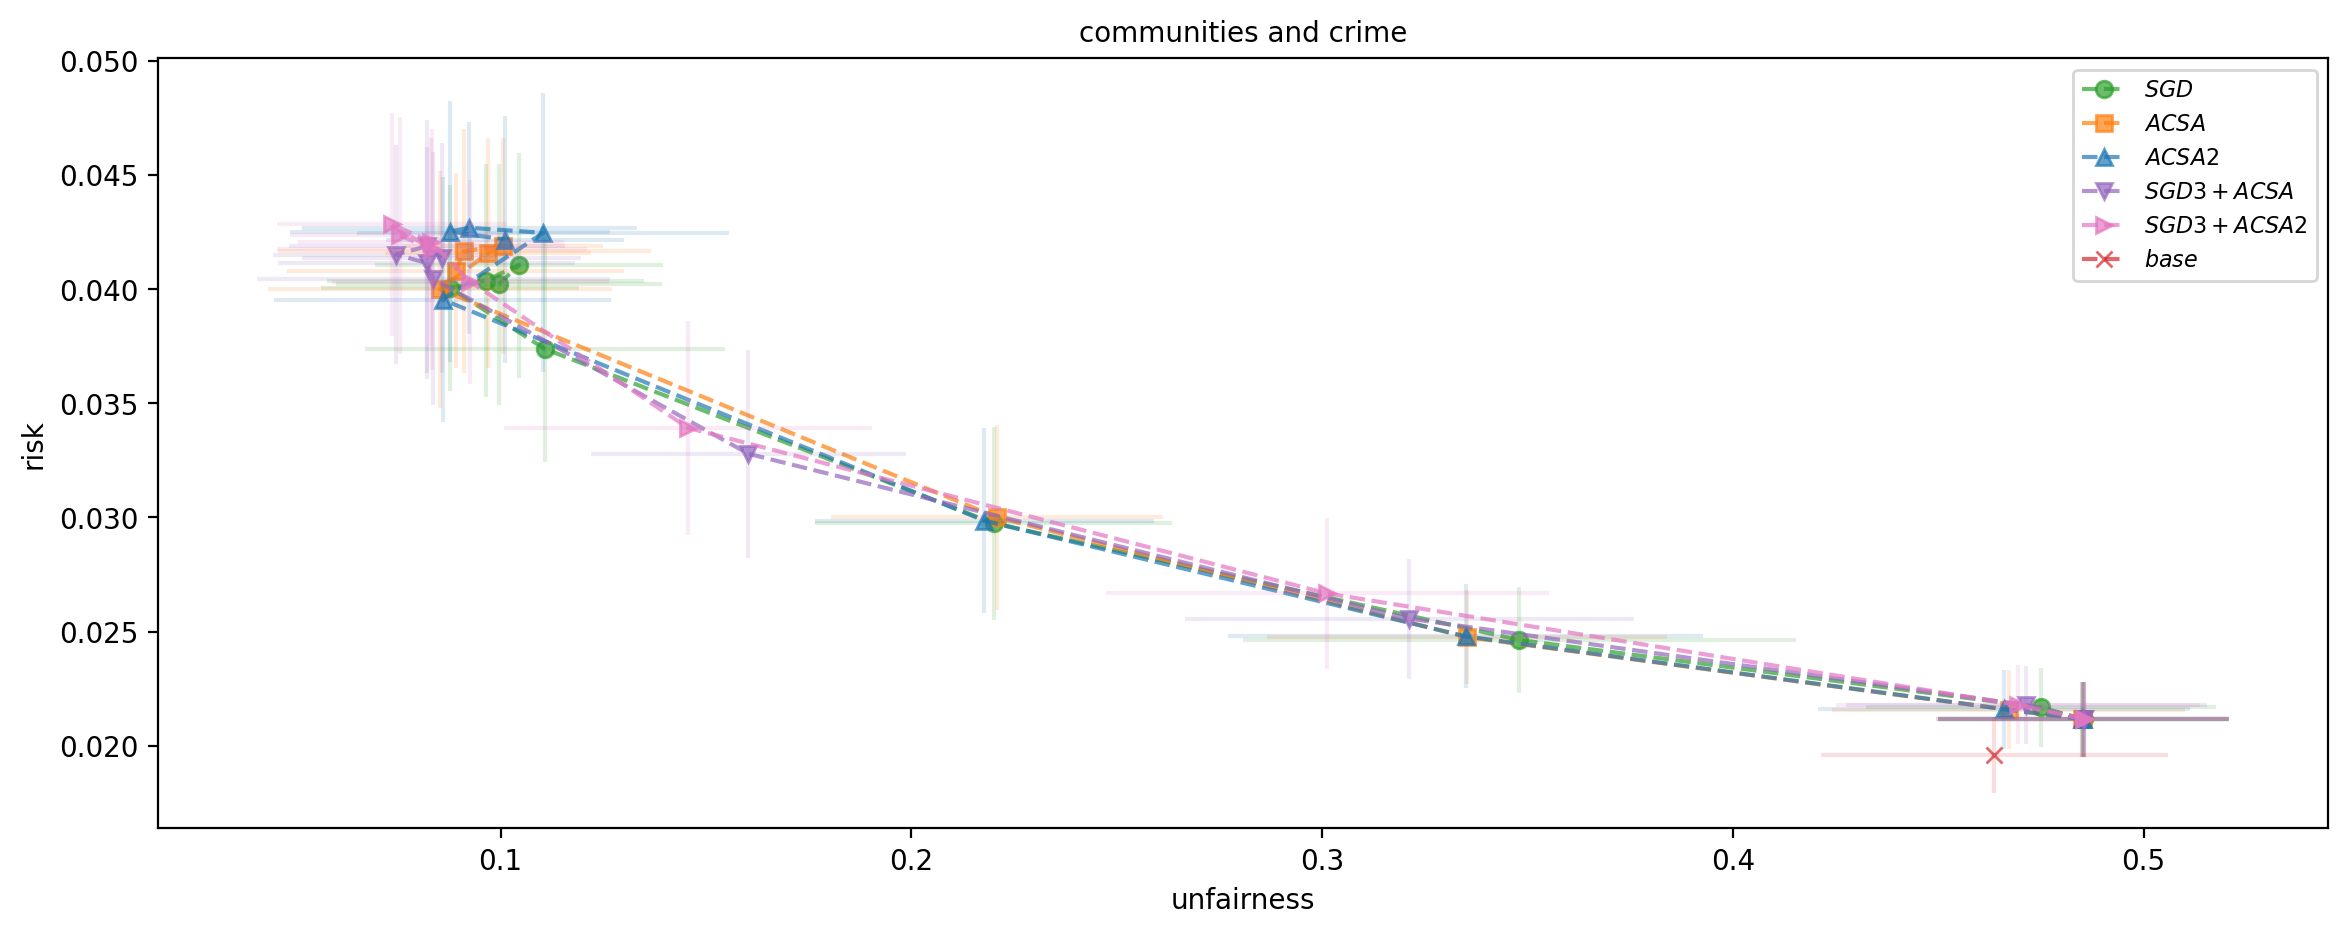

In [22]:
pairs_list = [[results_crime_sdg['unf'], results_crime_sdg['risk']],
              [results_crime_acsa['unf'], results_crime_acsa['risk']],
              [results_crime_acsa2['unf'], results_crime_acsa2['risk']],
              [results_crime_sgd3_acsa['unf'], results_crime_sgd3_acsa['risk']],
              [results_crime_sgd3_acsa2['unf'], results_crime_sgd3_acsa2['risk']],
              [results_crime_sgd3_acsa2['base_DP'], results_crime_sgd3_acsa2['base_risk']]]

model_list = [r'$SGD$',r'$ACSA$', r'$ACSA2$',r'$SGD3+ACSA$', r'$SGD3+ACSA2$',r'$base$']
unf_type_list = ['DP','DP','DP', 'DP','DP', 'DP']
risk_type_list = ['prob','prob', 'prob','prob', 'prob', 'mse']
markers_list = ['o', 's','^','v', '>','x']
dataset='communities and crime'
colors=[['tab:green'],['tab:orange'],['tab:blue'],['tab:purple'],['tab:pink'], ['tab:red']]
S_list=[0]

plot_risk_unf_compare(pairs_list=pairs_list, model_list=model_list, unf_type_list=unf_type_list, risk_type_list=risk_type_list,
                          markers_list=markers_list, dataset=dataset, 
                          x_label = 'unfairness', y_label = 'risk',
                          S_list=S_list, colors = colors, legend_size=8, alpha=0.7, 
                          plot_std=True, annotate=False, loglog=False, start_0=False, label='short', linestyle='dashed')

# Law School

In [11]:
num=10
T=5000

eps_list = []
i_list  = [0, 1, 2, 4, 5, 6, 8, 16, 32, 64, 128]
for i in i_list:
    eps_list+=[[2**(-i), 2**(-i)]]

### SDG 

In [12]:
results_law_sdg = get_risk_unf_wrt_eps(dataset='lawschool', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     alg={'base':'SGD'},
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 11  : collecting statistics for eps=[1, 1]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 11  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 :

In [13]:
results_law_sdg

{'risk': {'mean': [0.01149757897964552,
   0.01149990862005007,
   0.011498678223826326,
   0.011534588111630342,
   0.01156493396906971,
   0.011609726644053322,
   0.01177829099833182,
   0.011871992800874228,
   0.01179386686892343,
   0.011835959192884243,
   0.011934852858741334],
  'std': [0.0007585354566157211,
   0.000762325338454518,
   0.0007589493482452369,
   0.0007532636563983055,
   0.000743692161055805,
   0.0007956382372679242,
   0.0008228440746694512,
   0.0009406767676906469,
   0.0008706367121731333,
   0.000889373135953316,
   0.0010044850530650704]},
 'unf': {0: {'mean': [0.1490576896415195,
    0.14840074582588286,
    0.14888922914362113,
    0.1266510795712368,
    0.10735351863701381,
    0.08424308339891717,
    0.053229824561373464,
    0.058588614093105916,
    0.04794481025491361,
    0.054576185411015055,
    0.0674260031062506],
   'std': [0.04959668574046484,
    0.048872023974288546,
    0.04973613105589466,
    0.049826612426886956,
    0.063516957434

#### AC-SA

In [14]:
results_law_acsa = get_risk_unf_wrt_eps(dataset='lawschool', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     alg={'base':'ACSA'},
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 11  : collecting statistics for eps=[1, 1]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 11  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 :

In [15]:
results_law_acsa

{'risk': {'mean': [0.0114977962307665,
   0.011499120536294753,
   0.011502408742383874,
   0.011540933058080622,
   0.011609613830225822,
   0.01170543476720045,
   0.01204810076551285,
   0.012140669656039124,
   0.012208412620270954,
   0.012205356665082559,
   0.01225204531802937],
  'std': [0.0007583694720942484,
   0.0007578971012443998,
   0.0007565969631921784,
   0.0007535258704956132,
   0.000758983186239245,
   0.0008049977027683607,
   0.0010156535583373393,
   0.0011386973796547566,
   0.0012326138322145393,
   0.0011858940456955706,
   0.001209695942612623]},
 'unf': {0: {'mean': [0.14891776829202966,
    0.14825475913579772,
    0.1464317593266158,
    0.11978832352018172,
    0.08103208987370433,
    0.05015642796644507,
    0.05643628259260115,
    0.06439702288169098,
    0.060551856585740436,
    0.05573781930657799,
    0.057840043600630386],
   'std': [0.04968933558598165,
    0.04983149276281257,
    0.05010234542461242,
    0.05137246291772528,
    0.048458180435

#### AC-SA-2

In [16]:
results_law_acsa2 = get_risk_unf_wrt_eps(dataset='lawschool', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     alg={'base':'ACSA2'},
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 11  : collecting statistics for eps=[1, 1]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 11  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 :

In [17]:
results_law_acsa2

{'risk': {'mean': [0.011497798530030117,
   0.011499139483001646,
   0.01150240445317647,
   0.011539667092164784,
   0.011596696958371972,
   0.011675662983593356,
   0.012227397888073342,
   0.012663246754604066,
   0.01253369131723701,
   0.012649002005405257,
   0.012682041700417538],
  'std': [0.0007583597004510173,
   0.0007578812985954466,
   0.0007564532418435161,
   0.0007533164541110195,
   0.0007583240924644965,
   0.0007901243980894873,
   0.0012558211286579817,
   0.001589160592467691,
   0.0016643368163474527,
   0.0017810696039039058,
   0.0017033852390777235]},
 'unf': {0: {'mean': [0.14891598951392965,
    0.1482381643923581,
    0.14659918830177102,
    0.11840679678321826,
    0.082366180763136,
    0.05107375076591034,
    0.0616052520262218,
    0.06497906569085302,
    0.055848979352372444,
    0.058812506337984974,
    0.058741901128491994],
   'std': [0.049693828423322046,
    0.0498029675542864,
    0.0500856287735228,
    0.05036154772515254,
    0.05002755359

#### SGD3 with AC-SA

In [18]:
results_law_sgd3_acsa = get_risk_unf_wrt_eps(dataset='lawschool', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     alg={'base':'SGD3', 'method':'ACSA'},
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 11  : collecting statistics for eps=[1, 1]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 11  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 :

In [19]:
results_law_sgd3_acsa

{'risk': {'mean': [0.011497666738405118,
   0.011497678593313224,
   0.011497711022669764,
   0.011537531914270161,
   0.011665029094610502,
   0.011836627075449368,
   0.01197718224953177,
   0.011933941340210863,
   0.0118902410266941,
   0.011964302422546669,
   0.011952705986715847],
  'std': [0.0007583929522746023,
   0.0007583885826330271,
   0.0007583703782960649,
   0.0007523403837044549,
   0.0007723186919674058,
   0.0008844343220617718,
   0.0009937866577077092,
   0.0008768536297726953,
   0.0009354937877044636,
   0.0010055985763961156,
   0.0010107447947369536]},
 'unf': {0: {'mean': [0.14900284017663218,
    0.14899705680437825,
    0.14898546664142825,
    0.12592364373014825,
    0.06850205618500331,
    0.0490345563559248,
    0.04863668144069184,
    0.045967922653470814,
    0.045547709402324645,
    0.048494446367412306,
    0.046780559180752704],
   'std': [0.04965803736677762,
    0.04965950702403223,
    0.04966270032415544,
    0.05171252067361986,
    0.035471

#### SGD3 with AC-SA-2

In [10]:


results_law = get_risk_unf_wrt_eps(dataset='lawschool', num=num, T=T, eps_list=eps_list, 
                                     print_details = True, beta='auto', L='auto', 
                                     TRAIN_SIZE=0.4, UNLAB_SIZE=0.4, TEST_SIZE=0.2)

1 / 11  : collecting statistics for eps=[1, 1]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 : training completed, statistics collected
-----    6 / 10 : training completed, statistics collected
-----    7 / 10 : training completed, statistics collected
-----    8 / 10 : training completed, statistics collected
-----    9 / 10 : training completed, statistics collected
-----    10 / 10 : training completed, statistics collected
---------------------------------------------------------
2 / 11  : collecting statistics for eps=[0.5, 0.5]
-----    1 / 10 : training completed, statistics collected
-----    2 / 10 : training completed, statistics collected
-----    3 / 10 : training completed, statistics collected
-----    4 / 10 : training completed, statistics collected
-----    5 / 10 :

In [11]:
results_law

{'risk': {'mean': [0.011497672718490611,
   0.011497752816763492,
   0.011497841827333407,
   0.011567493452721359,
   0.011687636624400194,
   0.011845185062485823,
   0.011743468400506208,
   0.011897317623108831,
   0.01180654488943394,
   0.011949808103763032,
   0.0118981780790591],
  'std': [0.0007583909169830077,
   0.000758357661492659,
   0.0007582829904289239,
   0.000753790424804711,
   0.0007441568632737463,
   0.0007973583539849338,
   0.0007533436713555453,
   0.0008051190888263243,
   0.0007297684953543478,
   0.0009342229306936134,
   0.0009610391293130517]},
 'unf': {0: {'mean': [0.14899990426895407,
    0.14897062675965056,
    0.14885174011393118,
    0.10921234098828514,
    0.06973226056391141,
    0.05707270063989689,
    0.04447720421022579,
    0.05840153802656536,
    0.05091201747947045,
    0.06649471275643212,
    0.04471651131986325],
   'std': [0.04965825202301139,
    0.049673768140796715,
    0.04970542738007524,
    0.051849185772985605,
    0.040743280

In [20]:
results_law_sgd3_acsa2 = {'risk': {'mean': [0.011497672718490611,
   0.011497752816763492,
   0.011497841827333407,
   0.011567493452721359,
   0.011687636624400194,
   0.011845185062485823,
   0.011743468400506208,
   0.011897317623108831,
   0.01180654488943394,
   0.011949808103763032,
   0.0118981780790591],
  'std': [0.0007583909169830077,
   0.000758357661492659,
   0.0007582829904289239,
   0.000753790424804711,
   0.0007441568632737463,
   0.0007973583539849338,
   0.0007533436713555453,
   0.0008051190888263243,
   0.0007297684953543478,
   0.0009342229306936134,
   0.0009610391293130517]},
 'unf': {0: {'mean': [0.14899990426895407,
    0.14897062675965056,
    0.14885174011393118,
    0.10921234098828514,
    0.06973226056391141,
    0.05707270063989689,
    0.04447720421022579,
    0.05840153802656536,
    0.05091201747947045,
    0.06649471275643212,
    0.04471651131986325],
   'std': [0.04965825202301139,
    0.049673768140796715,
    0.04970542738007524,
    0.051849185772985605,
    0.04074328043469073,
    0.04079956272514319,
    0.020032514856384798,
    0.029354294521158855,
    0.028542210619414855,
    0.040172836479340536,
    0.0279792204604127]},
  1: {'mean': [0.028380934146467474,
    0.028375357478028697,
    0.028352712402653534,
    0.020802350664435223,
    0.013282335345506912,
    0.01087099059807558,
    0.00847184842099546,
    0.011124102481250583,
    0.009697527138946787,
    0.012665659572653745,
    0.008517430727592961],
   'std': [0.009458714671049789,
    0.00946167012205653,
    0.009467700453347667,
    0.009876035385330596,
    0.007760624844703009,
    0.007771345280979611,
    0.003815717115501894,
    0.00559129419450645,
    0.005436611546555204,
    0.0076519688532077695,
    0.005329375325792922]}},
 'avg_prob_unf': {0: {'mean': [0.010276009152666485,
    0.010273989704806247,
    0.010265789752392463,
    0.007537244618772814,
    0.005220867390277313,
    0.005007863494470618,
    0.0037286325687006855,
    0.00498046309135238,
    0.004218987373302825,
    0.0055108174111049854,
    0.0039695570381389255],
   'std': [0.0034247008638460833,
    0.0034257710043848625,
    0.0034279547978063756,
    0.003570383017111697,
    0.0025785900256592447,
    0.0026188320021635013,
    0.0012021303540386559,
    0.002034478307471999,
    0.0017151672795826382,
    0.002850180853184542,
    0.002015274039322891]},
  1: {'mean': [0.0019573350766983774,
    0.0019569504199630954,
    0.0019553885242652317,
    0.0014356656416710134,
    0.0009944509314813905,
    0.0009538787608515448,
    0.0007102157273715602,
    0.0009486596364480735,
    0.0008036166425338723,
    0.0010496795068771383,
    0.0007561061025026523],
   'std': [0.0006523239740659218,
    0.0006525278103590228,
    0.0006529437710107368,
    0.0006800729556403225,
    0.0004911600048874733,
    0.0004988251432692368,
    0.0002289772102930795,
    0.0003875196776137125,
    0.00032669852944431033,
    0.0005428915910827716,
    0.00038386172177578816]}},
 'base_risk': {'mean': 0.009187527889053106, 'std': 0.0007582421403606248},
 'base_DP': {0: {'mean': 0.23062500000000002, 'std': 0.07792273817699169},
  1: {'mean': 0.04392857142857145, 'std': 0.01484242631942699}},
 'training_time_hist': [0.7188527584075928,
  0.8833496570587158,
  0.7598516941070557,
  0.8099727630615234,
  0.7573959827423096,
  0.7399911880493164,
  0.7751049995422363,
  0.7387797832489014,
  0.7030124664306641,
  0.7318050861358643,
  0.7828214168548584,
  0.7347879409790039,
  0.8156065940856934,
  0.8629684448242188,
  0.7450840473175049,
  0.7161209583282471,
  0.7407112121582031,
  0.7778224945068359,
  0.6909527778625488,
  0.8695728778839111,
  0.6777341365814209,
  0.8329958915710449,
  0.7390298843383789,
  0.8119380474090576,
  0.7273070812225342,
  0.6722567081451416,
  0.7629191875457764,
  0.7534434795379639,
  0.7229001522064209,
  0.8583438396453857,
  0.8304262161254883,
  0.6979284286499023,
  0.8096415996551514,
  0.8007521629333496,
  0.79311203956604,
  0.6701195240020752,
  0.7465207576751709,
  0.7646732330322266,
  0.7232334613800049,
  0.8225255012512207,
  0.8156399726867676,
  1.1073615550994873,
  1.0930500030517578,
  0.9235525131225586,
  0.8431947231292725,
  0.8472294807434082,
  0.8826420307159424,
  0.8164725303649902,
  0.7826528549194336,
  0.7604002952575684,
  0.7186920642852783,
  0.7080810070037842,
  0.7007308006286621,
  0.7822153568267822,
  0.7455275058746338,
  0.776207447052002,
  0.6953506469726562,
  0.7091968059539795,
  0.7754373550415039,
  0.7258186340332031,
  0.7819015979766846,
  0.7400124073028564,
  0.8604633808135986,
  0.8503868579864502,
  0.7467026710510254,
  0.8365392684936523,
  0.9734523296356201,
  0.8942186832427979,
  0.7945091724395752,
  0.7114381790161133,
  0.7221765518188477,
  0.7812316417694092,
  0.6852290630340576,
  0.659843921661377,
  0.7829403877258301,
  0.8029062747955322,
  0.7500357627868652,
  0.8526978492736816,
  0.8779993057250977,
  0.7337367534637451,
  0.7552025318145752,
  0.7661600112915039,
  0.6688425540924072,
  0.7483055591583252,
  0.6862308979034424,
  0.6663901805877686,
  0.8722896575927734,
  0.9395163059234619,
  0.9738991260528564,
  0.8791971206665039,
  0.8305873870849609,
  0.8665318489074707,
  0.700019359588623,
  0.7396295070648193,
  0.8382232189178467,
  0.6994237899780273,
  0.6835970878601074,
  0.7169764041900635,
  0.8466215133666992,
  0.8351202011108398,
  0.8655045032501221,
  0.8209378719329834,
  0.7996504306793213,
  0.7347261905670166,
  0.8394653797149658,
  0.8219671249389648,
  0.7580649852752686,
  0.6674444675445557,
  0.8481268882751465,
  0.6763932704925537],
 'clf_score': 0.878}

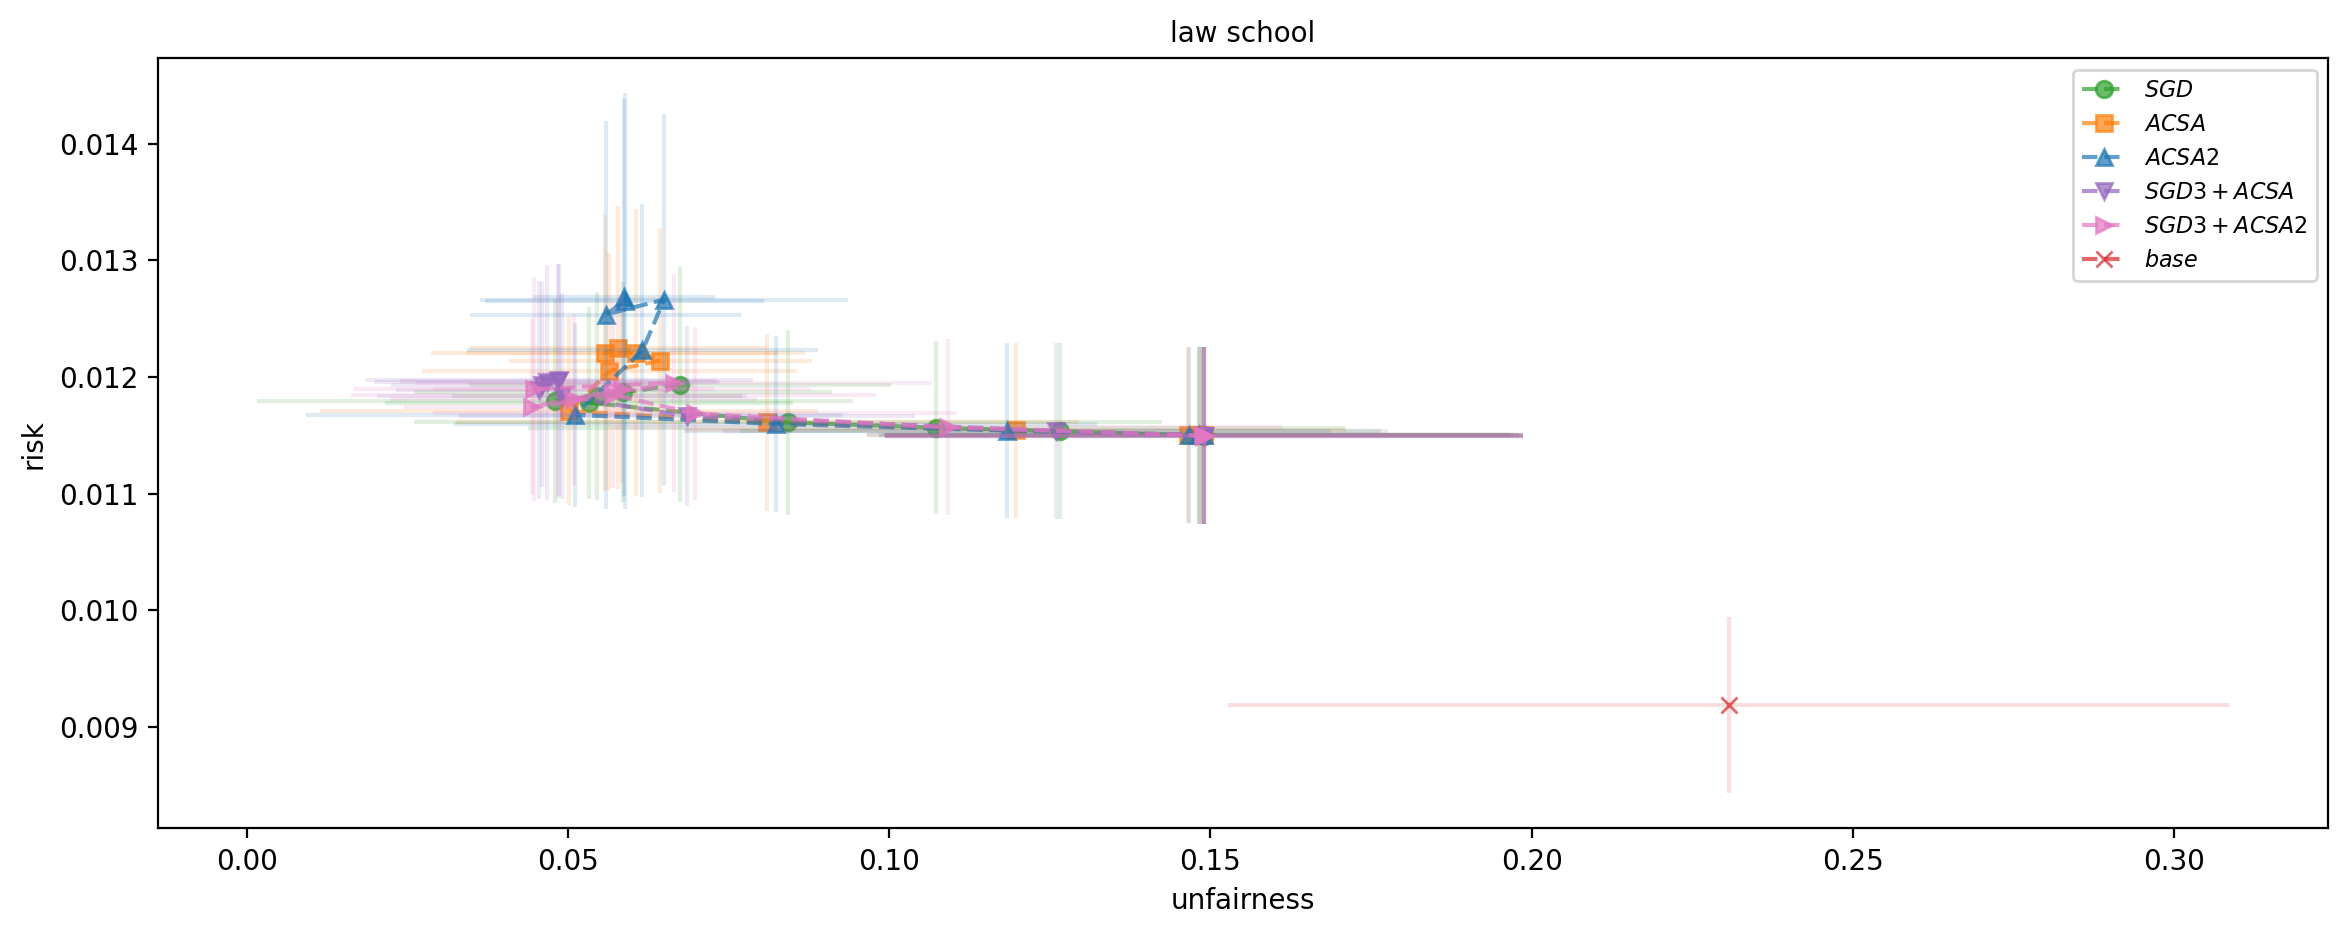

In [26]:
pairs_list = [[results_law_sdg['unf'], results_law_sdg['risk']],
              [results_law_acsa['unf'], results_law_acsa['risk']],
              [results_law_acsa2['unf'], results_law_acsa2['risk']],
              [results_law_sgd3_acsa['unf'], results_law_sgd3_acsa['risk']],
              [results_law_sgd3_acsa2['unf'], results_law_sgd3_acsa2['risk']],
              [results_law_sgd3_acsa2['base_DP'], results_law_sgd3_acsa2['base_risk']]]

model_list = [r'$SGD$',r'$ACSA$', r'$ACSA2$',r'$SGD3+ACSA$', r'$SGD3+ACSA2$',r'$base$']
unf_type_list = ['DP','DP','DP', 'DP','DP', 'DP']
risk_type_list = ['prob','prob', 'prob','prob', 'prob', 'mse']
markers_list = ['o', 's','^','v', '>','x']
dataset='law school'
colors=[['tab:green'],['tab:orange'],['tab:blue'],['tab:purple'],['tab:pink'], ['tab:red']]
S_list=[0]

plot_risk_unf_compare(pairs_list=pairs_list, model_list=model_list, unf_type_list=unf_type_list, risk_type_list=risk_type_list,
                          markers_list=markers_list, dataset=dataset, 
                          x_label = 'unfairness', y_label = 'risk',
                          S_list=S_list, colors = colors, legend_size=8, alpha=0.7, 
                          plot_std=True, annotate=False, loglog=False, start_0=False, label='short', linestyle='dashed')